In [1]:
import numpy as np
import sympy
import sympy.stats
from matplotlib import pyplot as plt

import common

this function has four local minima, one of which is the
unique global minimum at $\boldsymbol{\theta^{\star}}$

In [2]:
num_dims = 2

In [3]:
# theta_0 = np.matrix(np.ones(num_dims)).T
theta_0 = np.matrix([4.0, 6.4]).T

In [4]:
t1_sym, t2_sym = sympy.symbols(r't_{1} t_{2}')
loss_expr = (
    sympy.S.Half * (
        (t1_sym**4 - 16* t1_sym**2 + 5*t1_sym)
        +
        (t2_sym**4 - 16* t2_sym**2 + 5*t2_sym)
    )
)
grad_loss_expr = sympy.Matrix([
    loss_expr.diff(t_var)
    for t_var in [t1_sym, t2_sym]
])
hessian_expr = sympy.Matrix([
    [
        g_i.diff(t_var)
        for t_var in [t1_sym, t2_sym]
    ]
    for g_i in grad_loss_expr
])
display(grad_loss_expr)
display(hessian_expr)

Matrix([
[2*t_{1}**3 - 16*t_{1} + 5/2],
[2*t_{2}**3 - 16*t_{2} + 5/2]])

Matrix([
[6*t_{1}**2 - 16,               0],
[              0, 6*t_{2}**2 - 16]])

In [5]:
display(loss_expr)
print(sympy.latex(loss_expr))

t_{1}**4/2 - 8*t_{1}**2 + 5*t_{1}/2 + t_{2}**4/2 - 8*t_{2}**2 + 5*t_{2}/2

\frac{t_{1}^{4}}{2} - 8 t_{1}^{2} + \frac{5 t_{1}}{2} + \frac{t_{2}^{4}}{2} - 8 t_{2}^{2} + \frac{5 t_{2}}{2}


In [6]:
sols = [
    tuple(
        sympy.re(val)
        for val in sol
    )
    for sol in sympy.solve(grad_loss_expr, [t1_sym, t2_sym])
    if all([
        sympy.Eq(sympy.im(val),0) == sympy.S.true
        for val in sol 
    ])
]

In [7]:
grad_loss_expr.subs(dict(zip([t1_sym, t2_sym], sols[0]))).evalf()

Matrix([
[0.e-123],
[0.e-123]])

In [8]:
sympy.Matrix(sols[0])

Matrix([
[-4*sqrt(6)*cos(atan(sqrt(96279)/45)/3)/3],
[-4*sqrt(6)*cos(atan(sqrt(96279)/45)/3)/3]])

In [9]:
theta_star = np.matrix([
    float(sols[0][0]),
    float(sols[0][1]),
]).T

display(theta_star)

matrix([[-2.90353403],
        [-2.90353403]])

In [10]:
display(
    (
        hessian_expr.subs(dict(zip([t1_sym, t2_sym], [item[0,0] for item in theta_star])))
    )
    .is_positive_semidefinite,
)

True

In [11]:
def loss_func(theta):
    t1_val = theta[0,0]
    t2_val = theta[1,0]
    
    loss_val = (
        (t1_val**4 - 16* t1_val**2 + 5*t1_val)
        +
        (t2_val**4 - 16* t2_val**2 + 5*t2_val)
    ) / 2
    
    return loss_val

In [12]:
def grad_loss_func(theta):
    t1_val = theta[0,0]
    t2_val = theta[1,0]
    
    grad_loss_val = np.matrix([
        [2*t1_val**3 - 16*t1_val +5/2],
        [2*t2_val**3 - 16*t2_val +5/2],
    ])

    return grad_loss_val

In [13]:
loss_func(theta_0)

537.1808000000001

In [14]:
grad_loss_func(theta_0)

matrix([[ 66.5  ],
        [424.388]])

In [15]:
loss_func(theta_star)

-78.33233140754282

In [16]:
grad_loss_func(theta_star)

matrix([[7.10542736e-15],
        [7.10542736e-15]])

In [17]:
num_iteration=300
num_realizations=1_000
# num_iteration=100
# num_realizations=50

In [18]:
sigma = 0.1
noise_dist = sympy.stats.MultivariateNormal(
    r'\boldsymbol{e}',
    mu=sympy.zeros(num_dims,1),
    sigma=sigma**2 * sympy.eye(num_dims),
)

In [19]:
theta_data = [
    common.basic_root_finding(
        noisy_grad_loss_func=common.make_func_with_additive_noise(
            func=grad_loss_func,
            noise_dist=noise_dist,
        ),
        a_k_func=lambda k_index: 1/(k_index+1+100)**(0.501),
        random_state=np.random.RandomState(seed=r_index),
        num_iteration=num_iteration,
        theta_0=theta_star,
    )
    for r_index in range(num_realizations)
]

Mean Theta N Error     : 4.961606572967847
Mean Theta Bar N Error : 4.801944667563633
Mean Theta N Bar Error < Mean Theta N Error: True


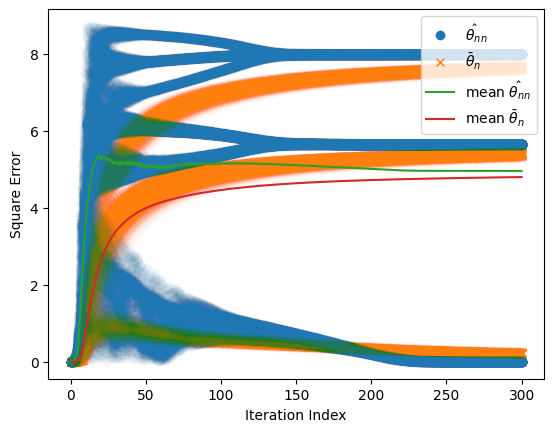

In [20]:
fig1, ax1 = common.plot_error_data(
    theta_data,
    theta_star,
)

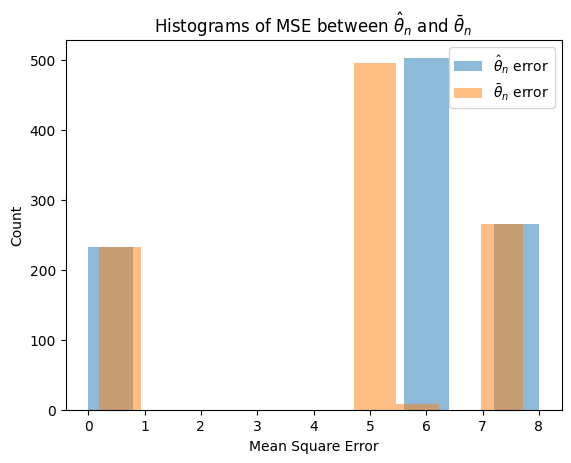

In [21]:
fig2, ax2 = common.plot_error_histogram(
    theta_data,
    theta_star,
)